In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
class Perceptron:

    def __init__(self, eta, epochs, log=False):
        self.eta = eta
        self.epochs = epochs
        self.log = log

    def fit(self, X, y):
        ones = np.ones((len(X), 1))
        X_1 = np.append(X, ones, axis=1)
        self.w = np.random.rand(X_1.shape[1])
        self.list_of_errors = []

        for epoch in range(self.epochs):
            n_errors = 0
            for x, y_target in zip(X_1, y):
                y_pred = self.predict(x)
                delta_w = self.eta*(y_target - y_pred)*x
                self.w += delta_w
                n_errors += 1 if y_target != y_pred else 0
            self.list_of_errors.append(n_errors)

        if self.log == True:
            plt.plot(range(self.epochs), self.list_of_errors)
            plt.show()
            print(self.w)
    
    def predict(self, x):
        z = np.dot(x , self.w)
        y_pred = 1 if z >= 0 else -1
        return y_pred        

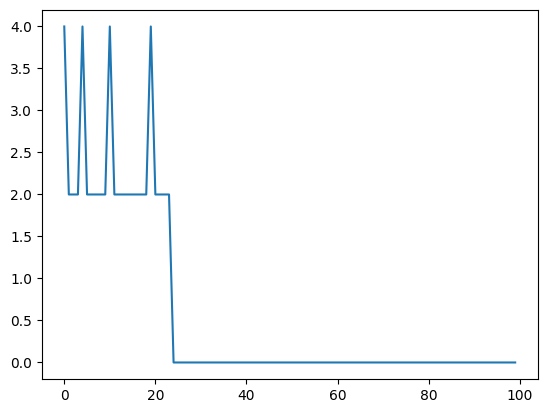

[ 1.23574447 -3.42005237  0.9307131   0.61394791]


In [36]:
X = np.array([
    [2, 4,  20],  # 2*2 - 4*4 + 20 =   8 > 0
    [4, 3, -10],  # 2*4 - 4*3 - 10 = -14 < 0
    [5, 6,  13],  # 2*5 - 4*6 + 13 =  -1 < 0
    [5, 4,   8],  # 2*5 - 4*4 + 8 =    2 > 0
    [3, 4,   5],  # 2*3 - 4*4 + 5 =   -5 < 0 
])
 
y = np.array([1, -1, -1, 1, -1])
 
perceptron = Perceptron(eta=0.05, epochs=100, log=True)            
perceptron.fit(X, y)

In [37]:
print(perceptron.predict(np.array([[1, 2, 3, 1]])))  # 2*1 - 4*2 + 3 = -3 < 0
print(perceptron.predict(np.array([[2, 2, 8, 1]])))  # 2*2 - 4*2 + 8 =  4 > 0
print(perceptron.predict(np.array([[3, 3, 3, 1]])))  # 2*3 - 4*3 + 3 = -3 < 0

-1
1
-1


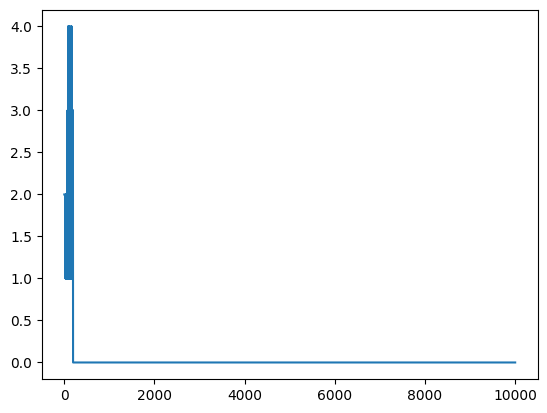

[ 0.20608483 -0.34681563  0.04047962  0.55989867]


In [46]:
X = np.array([
    [2, 4,  20],  # 2^2 - 4^2 + 20 =  8 > 0
    [4, 3, -10],  # 4^2 - 3^2 - 10 = -3 < 0
    [5, 6,  13],  # 5^2 - 6^2 + 13 =  2 > 0
    [5, 4,  -5],  # 5^2 - 4^2 - 5 =   4 > 0
    [3, 4,   5],  # 3^2 - 4^2 + 5 =  -2 < 0 
 
])
 
y = np.array([1, -1, 1, 1, -1])
 
perceptron = Perceptron(eta=0.001, epochs=10000, log=True)            
perceptron.fit(X, y)

In [47]:
print(perceptron.predict(np.array([[1, 2, 5, 1]])))  # 1^2 - 2^2 + 5 = 2 > 0
print(perceptron.predict(np.array([[2, 2, 8, 1]])))  # 2^2 - 2^2 + 8 =  8 > 0
print(perceptron.predict(np.array([[3, 5, 3, 1]])))  # 3^2 - 5^2 + 3 = -13 < 0

1
1
-1
